In [151]:
import scipy.linalg as sl
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1


In [152]:
A = [[2, 1, 1], [2, 0, 2], [4, 3, 4]]
b = [-1, 1, 1]

In [153]:
x = sl.solve(A, b)

assert np.allclose(np.dot(A, x), b)

# Exercise 2


In [154]:
def loop_current(V, R, N):
    A = np.zeros((N, N))
    np.fill_diagonal(A, 2 * R)
    np.fill_diagonal(A[1:], -R)
    np.fill_diagonal(A[:, 1:], -R)
    b = [V for _ in range(N)]
    return sl.solve(A, b)

In [155]:
V = 1
R = 1
N = 10

x = [loop_current(V, R, n) for n in range(1, N)]

x

[array([0.5]),
 array([1., 1.]),
 array([1.5, 2. , 1.5]),
 array([2., 3., 3., 2.]),
 array([2.5, 4. , 4.5, 4. , 2.5]),
 array([3., 5., 6., 6., 5., 3.]),
 array([3.5, 6. , 7.5, 8. , 7.5, 6. , 3.5]),
 array([ 4.,  7.,  9., 10., 10.,  9.,  7.,  4.]),
 array([ 4.5,  8. , 10.5, 12. , 12.5, 12. , 10.5,  8. ,  4.5])]

# Exercise 3


## a)


In [156]:
def power_iteration(A, x, num_simulations: int):
    for _ in range(num_simulations):
        x = np.dot(A, x)
        x = x / np.linalg.norm(x, np.inf)

    return x


In [157]:
A = [[1, 1, 0], [1, 1, 1], [0, 1, 1]]

In [158]:
x = np.random.rand(3)

for num_simulations in [10, 20, 30]:
    x = power_iteration(A, x, num_simulations)
    print(x)

[0.70714304 1.         0.70707053]
[0.70710678 1.         0.70710678]
[0.70710678 1.         0.70710678]


## b)


In [159]:
def rayleigh_quotient(A, x):
    return np.dot(x.T, np.dot(A, x)) / np.dot(x.T, x)

In [160]:
rayleigh_quotient(A, x)

np.float64(2.414213562373095)

## c)


In [161]:
sl.eig(A)

(array([-0.41421356+0.j,  1.        +0.j,  2.41421356+0.j]),
 array([[ 5.00000000e-01,  7.07106781e-01,  5.00000000e-01],
        [-7.07106781e-01,  4.91354351e-16,  7.07106781e-01],
        [ 5.00000000e-01, -7.07106781e-01,  5.00000000e-01]]))

# Exercise 4


## a)


In [162]:
def vander(ts, N):
    return np.vander(ts, increasing=True)

In [163]:
def P(x, cs):
    res = 0
    for i, c in enumerate(cs):
        res += c * (x**i)
    return res

In [164]:
p1 = [[-1, 1], [0, 0], [1, 1]]
p2 = [[0, 0], [1, 1], [2, 0], [3, 0]]

In [174]:
A1 = vander([x[0] for x in p1], 3)

b1 = [x[1] for x in p1]

c1 = sl.solve(A1, b1)

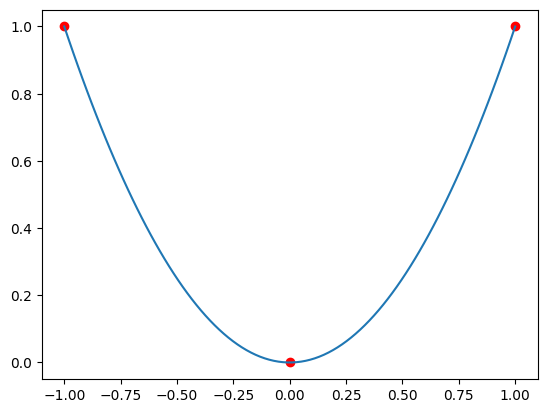

In [166]:
plt.plot([x[0] for x in p1], [x[1] for x in p1], "ro", label="P1 points")
plt.plot(np.linspace(-1, 1, 100), P(np.linspace(-1, 1, 100), c1), label="P1 polynomial")

In [167]:
A2 = vander([x[0] for x in p2], 4)

b2 = [x[1] for x in p2]

c2 = sl.solve(A2, b2)

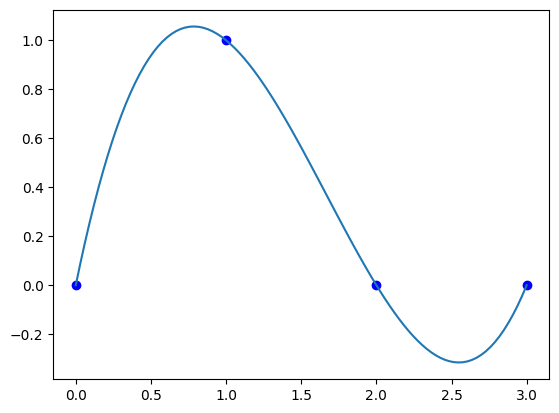

In [168]:
plt.plot([x[0] for x in p2], [x[1] for x in p2], "bo", label="P2 points")
plt.plot(np.linspace(0, 3, 100), P(np.linspace(0, 3, 100), c2), label="P2 polynomial")

## b)


In [169]:
N = 16

In [170]:
points = [[k / N, np.sin(np.pi * (k / N))] for k in range(0, N)]

In [171]:
def interpolate(points):
    A = vander([x[0] for x in points], len(points))
    b = [x[1] for x in points]
    return sl.solve(A, b)

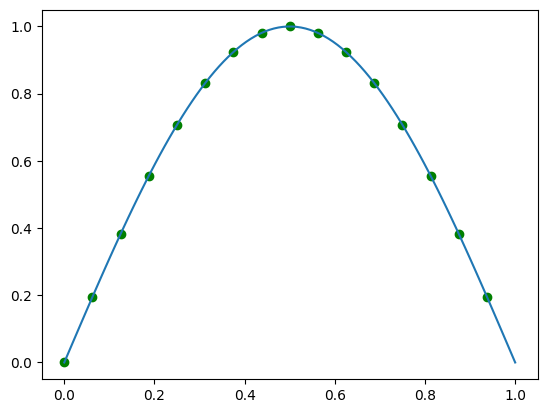

In [172]:
plt.plot([x[0] for x in points], [x[1] for x in points], "go", label="Random points")
c = interpolate(points)
plt.plot(
    np.linspace(0, 1, 100),
    P(np.linspace(0, 1, 100), c),
    label="Interpolating polynomial",
)

[ 1.73309897  0.18757707 -1.39611418  0.78756824  0.33527544  0.08148943
  0.1943554  -1.80096832 -0.45168409 -0.4290108   0.77545056  0.85026785
 -0.01036124 -2.00868748 -0.35827726 -0.60666347]
[[0.0, np.float64(0.0)], [0.0625, np.float64(0.19509032201612825)], [0.125, np.float64(0.3826834323650898)], [0.1875, np.float64(0.5555702330196022)], [0.25, np.float64(0.7071067811865475)], [0.3125, np.float64(0.8314696123025452)], [0.375, np.float64(0.9238795325112867)], [0.4375, np.float64(0.9807852804032304)], [0.5, np.float64(1.0)], [0.5625, np.float64(0.9807852804032304)], [0.625, np.float64(0.9238795325112867)], [0.6875, np.float64(0.8314696123025455)], [0.75, np.float64(0.7071067811865476)], [0.8125, np.float64(0.5555702330196022)], [0.875, np.float64(0.3826834323650899)], [0.9375, np.float64(0.1950903220161286)]]


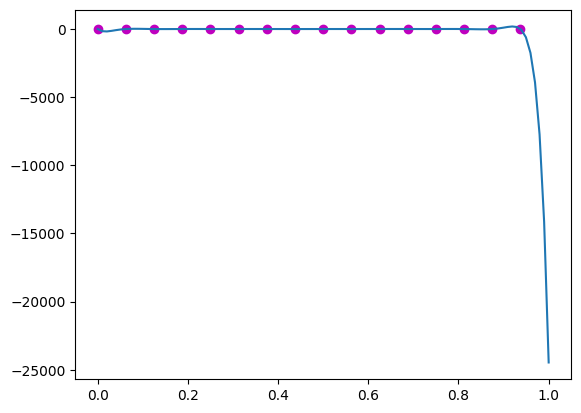

In [176]:
noise = np.random.randn(len(points))
print(noise)
noisy_points = [[x[0], x[1] + noise[i]] for i, x in enumerate(points)]
print(points)
plt.plot(
    [x[0] for x in noisy_points],
    [x[1] for x in noisy_points],
    "mo",
    label="Noisy points",
)

c_noisy = interpolate(noisy_points)

plt.plot(
    np.linspace(0, 1, 100),
    P(np.linspace(0, 1, 100), c_noisy),
    label="Noisy interpolating polynomial",
)